<a href="https://colab.research.google.com/github/seungmei/QNS/blob/main/%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D%EC%9C%BC%EB%A1%9C_%EB%B0%B0%EC%9A%B0%EB%8A%94_%EC%96%91%EC%9E%90%EC%BB%B4%ED%93%A8%ED%8C%85_6%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-ibm-runtime pylatexenc qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.2 MB/s eta 0:00:00
  Created whee

In [2]:
import qiskit
import numpy as np
qiskit.version.get_version_info()

'2.0.3'

# 6. 양자 소인수 분해 알고리즘
- 양자 연산: 양자 위상 추정(Quantum Phase Estimation, QPE)을 활용한 모듈러 지수 함수의 주기 찾기
- 고전 연산: 양자 연산을 통해 찾은 주기를 사용하여 정수의 소인수 찾기

## 6.1 사이먼 알고리즘

### 6.1.1 사이먼 함수

### 6.1.2 사이먼 알고리즘을 구현하는 양자 회로

### 6.1.3 사이먼 오라클 회로의 구현

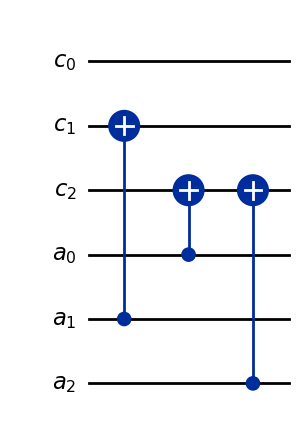

In [3]:
from qiskit import QuantumCircuit, QuantumRegister
# 3-qubit simon oracle with b = 101 을 정의하는 함수
def simon_oracle3(rc, ra):
    qc = QuantumCircuit(rc, ra)
    qc.cx(ra[1],rc[1])
    qc.cx(ra[0],rc[2])
    qc.cx(ra[2],rc[2])
    return qc

# 양자 레지스터와 고전 레지스터를 정의하고 이들을 사용하는 양자 회로를 초기화
n = 3
ra = QuantumRegister(n,'a')
rc = QuantumRegister(n,'c')
qc = QuantumCircuit(rc, ra)

# n=3 인 사이먼 오라클 회로를 양자 회로로 구현
oracle = simon_oracle3(rc, ra)
oracle.draw(output='mpl')

### 6.1.4 사이먼 회로의 구현

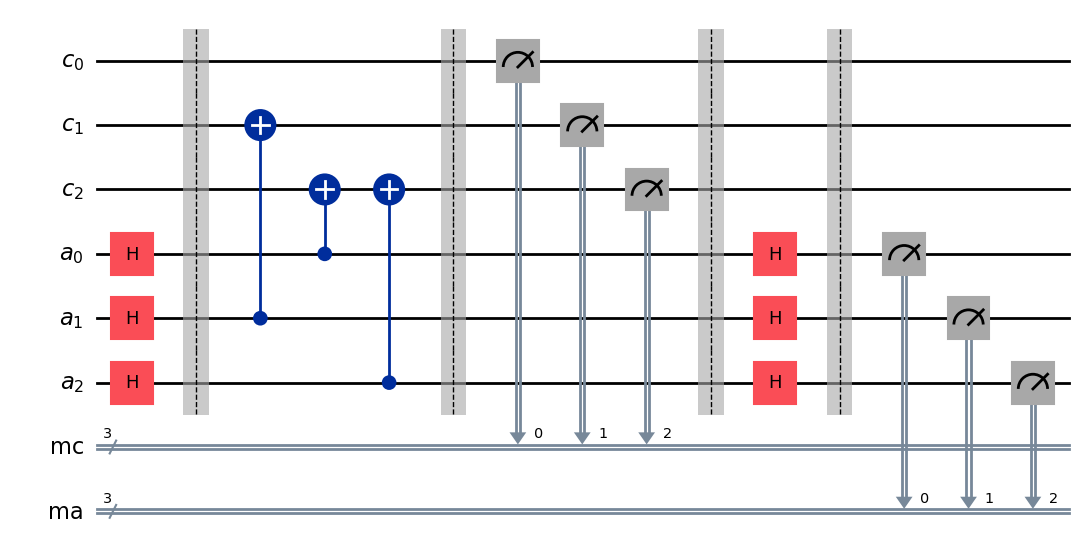

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# 사이먼 회로의 구현
n = 3
ra = QuantumRegister(n,'a')
rc = QuantumRegister(n,'c')
rma = ClassicalRegister(n,'ma')
rmc = ClassicalRegister(n,'mc')
qc = QuantumCircuit(rc, ra, rmc, rma)

qc.h(ra)
qc.barrier()
qc.compose(simon_oracle3(rc,ra),range(2*n),inplace=True)
qc.barrier()
qc.measure(rc,rmc)
qc.barrier()
qc.h(ra)
qc.barrier()
qc.measure(ra,rma)
qc.draw(output='mpl',fold=-1)

In [5]:
# AerSimulator 를 이용하여 circuit 회로를 측정한 결과를 출력
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=n+20)
result = job.result()
count = result[0].data.ma.get_counts()
print(count)

{'000': 6, '101': 7, '111': 6, '010': 4}


b=[0, 1, 0, 0, 1]


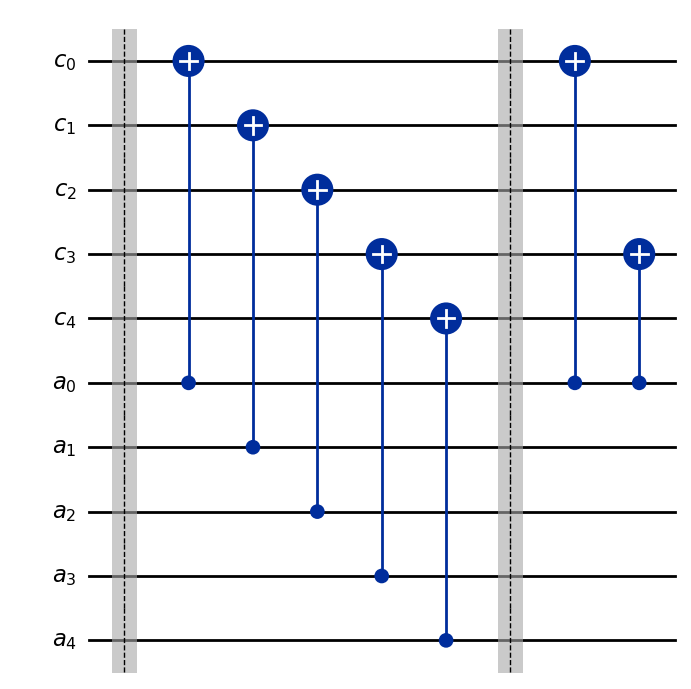

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# n-큐비트 사이먼 오라클 함수를 구현하는 회로와 random b 를 반환하는 회로
def simon_oracle(rc, ra, n):
    qc = QuantumCircuit(rc, ra)
    np.random.seed()
    k = np.random.randint(1,n+1)
    b1 = np.random.permutation(n)[:k]
    b = []
    for i in range(n):
        if i in b1: b += [1]
        else :      b += [0] # 임의의 non-zero b 를 생성

    qc.barrier()
    for i in range(n): # c[i] ^= a[i]
        qc.cx(ra[i],rc[i])
    qc.barrier()
    for bi in b1:      # c^f(x^b) 를 c^f(x) 와 같게 만듦
        qc.cx(ra[n-1-b1[0]],rc[n-1-bi])

    return qc,b

# 양자 레지스터와 고전 레지스터를 정의하고 이들을 사용하는 양자 회로를 초기화
n = 5
ra = QuantumRegister(n,'a')
rc = QuantumRegister(n,'c')
rm = ClassicalRegister(n,'m')
qc = QuantumCircuit(rc, ra, rm)

# 사이먼 오라클 회로를 양자 회로로 구현
oracle, b = simon_oracle(rc,ra,n)
print(f"b={b}")
oracle.draw(output='mpl', fold=-1)

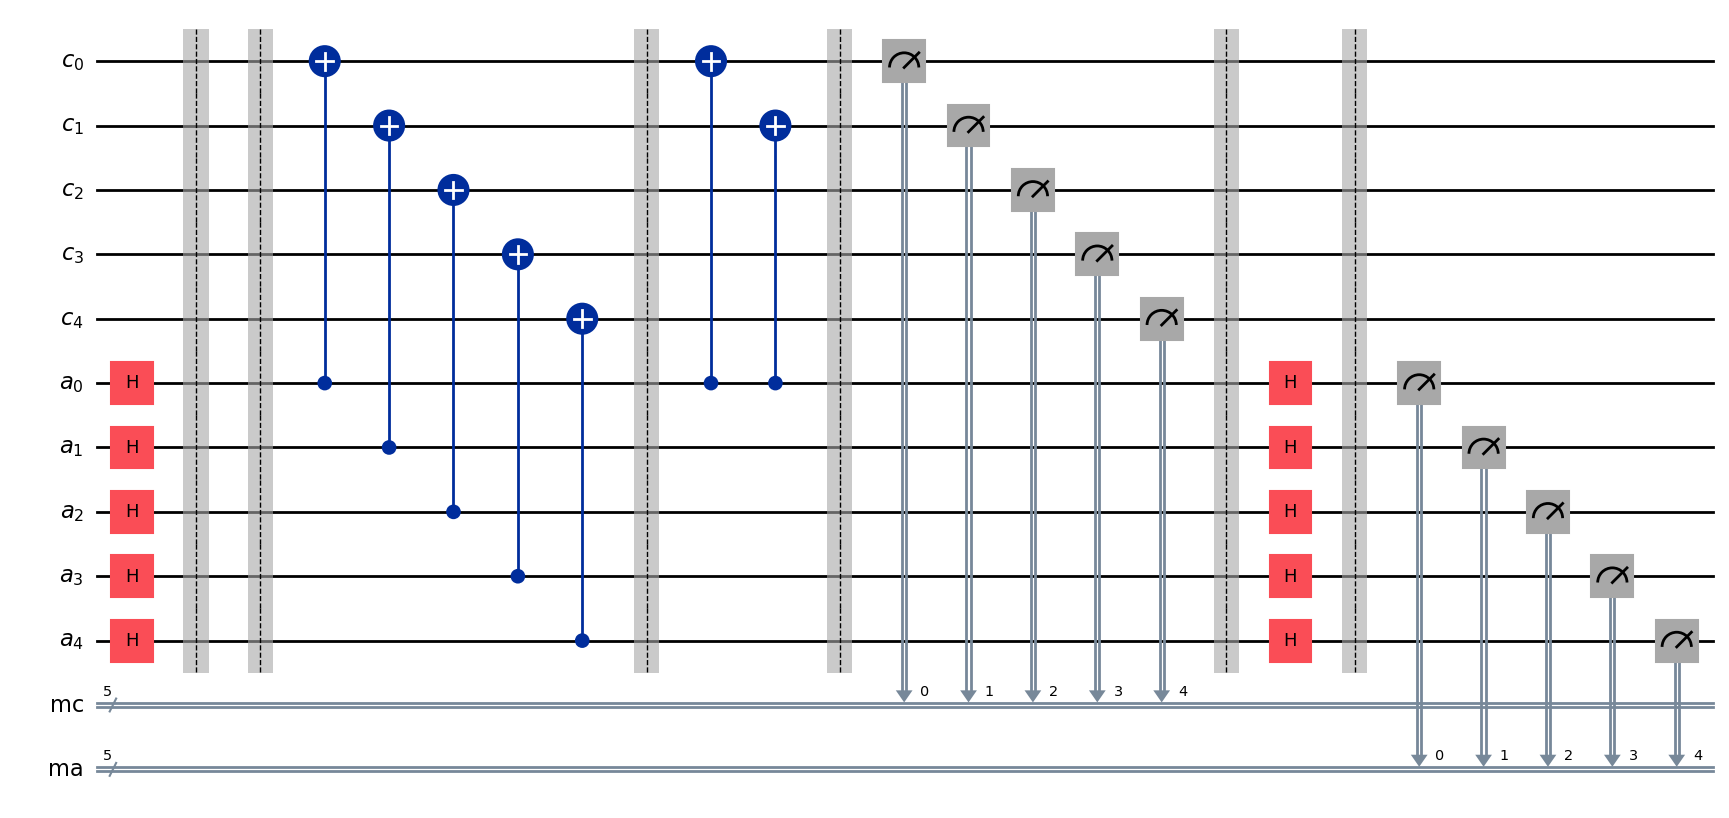

In [7]:
# 사이먼 회로의 구현
n = 5
ra = QuantumRegister(n,'a')
rc = QuantumRegister(n,'c')
rma = ClassicalRegister(n,'ma')
rmc = ClassicalRegister(n,'mc')
qc = QuantumCircuit(rc, ra, rmc, rma)

qc.h(ra)
qc.barrier()
oracle, b = simon_oracle(rc,ra,n)
qc.compose(oracle,range(2*n),inplace=True)
qc.barrier()
qc.measure(rc,rmc)
qc.barrier()
qc.h(ra)
qc.barrier()
qc.measure(ra,rma)
qc.draw(output='mpl',fold=-1)

In [8]:
# AerSimulator 를 이용하여 circuit 회로를 측정한 결과를 출력
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=n+20)
result = job.result()
count = result[0].data.ma.get_counts()
print(count)

{'10000': 1, '00111': 5, '11100': 2, '00100': 1, '11011': 1, '00000': 4, '10100': 3, '11111': 1, '01000': 2, '01100': 1, '10011': 2, '01111': 1, '01011': 1}


### 6.1.5 측정값으로부터 사이먼 주기를 찾는 알고리즘

In [9]:
import numpy as np                                      #type: ignore
def rank_mod2(matrix):
    rows, cols = matrix.shape
    rank = 0
    for c in range(cols):
        # find the pivot row in column c
        for r in range(rank, rows):
            if matrix[r,c] != 0:
                # swap rows if needed
                if r != rank:
                    matrix[[rank,r]] = matrix[[r,rank]]

                # eliminate column below
                for k in range(rank+1, rows):
                    if matrix[k,c] == 1:
                        matrix[k] ^= matrix[rank]
                rank += 1
                break
    return rank

def indep(sys,e):
    sys.append(e)
    matrix = np.array(sys)
    n = len(sys)
    if rank_mod2(matrix) == n:
        return True
    else:
        sys.pop()
        return False

#  Gaussian Elimination in modulo-2
def ge_mod2(A):
    n = len(A)+1
    matrix = np.matrix(A)
    # Gaussian elimination
    for i in range(n-1):
        # Find the pivot row
        pivot = i
        while pivot < (n-1) and matrix[pivot,i] == 0:
            pivot += 1
        if pivot < (n-1):
            matrix[[i,pivot]] = matrix[[pivot,i]] # swap rows
            # Eliminate rows below
            for j in range(i + 1, n-1):
                if matrix[j, i] == 1:
                    matrix[j] ^= matrix[i]  # Row operation with XOR
    return matrix

#  Back Substitution in modulo-2
def back_substitution_mod2(matrix):
    # Back substitution to get a NON TRIVIAL solution
    _, n = matrix.shape
    x = -2*np.ones(n, dtype=int) # x[i] == -1 means x[i] is unknown yet
    x[-2] = x[-1] = -1                    # last row : 0....0011
    if matrix[n-2,-1] == 0 : x[-2] = 0    # last row : 0....0010
    elif matrix[n-2,-2] == 0 : x[-1] = 0  # last row : 0....0001
    for r in range(n-3, -1, -1):
        if matrix[:,r].sum() == 0 :
            x[r] = 1
        value = 0
        for c in range(r,n):
            if matrix[r,c] == 1 :
                if x[c] < 0 : break
        unknown = 0
        for j in range(c + 1, n):
            if matrix[r,j] == 1:
                if x[j] == -2: x[j] = -1
                if x[j] == -1:  unknown = 1 - unknown
                else :          value ^=  x[j]  # XOR to solve mod-2 equations
        if unknown == 1 : x[c] = -1
        else :
            if x[c] == -1:
                for j in range(r+1, n):
                    if x[j] == -1: x[j] = value
            x[c] = value
    # determine the unknown
    x1 = x.copy()
    for i in range(n):
        if x[i] == -1 : x1[i] = 1
    for r in range(n-1):
        v = 0
        for c in range(n):
            v ^= matrix[r,c] & x1[c]
        if v == 1 :
            for i in range(n):
                if x[i] == -1 : x[i] = 0
            return x
    return x1


def solve_simon(measured):
    sys_eq = []
    for z in measured.keys():
        n = len(z)
        if int(z) == 0 : continue  # skip all 0's
        eq = [int(zi) for zi in z] # binary string -> int list
        if len(sys_eq) == 0:
            sys_eq.append(eq)
            continue
        if (indep(sys_eq, eq)):
            if (len(sys_eq) == (n-1)):
                break
    print("The following z's are measured : ")
    print(np.array(sys_eq))
    matrix = ge_mod2(sys_eq)
    print("REF matrix:")
    print(matrix)
    b = back_substitution_mod2(matrix)
    return b

print("measured output : ", count)
b_simon = solve_simon(count)
print(f"The period of a function f(x)) with Simon Property is {b_simon}")

measured output :  {'10000': 1, '00111': 5, '11100': 2, '00100': 1, '11011': 1, '00000': 4, '10100': 3, '11111': 1, '01000': 2, '01100': 1, '10011': 2, '01111': 1, '01011': 1}
The following z's are measured : 
[[1 0 0 0 0]
 [0 0 1 1 1]
 [1 1 1 0 0]
 [0 0 1 0 0]]
REF matrix:
[[1 0 0 0 0]
 [0 1 1 0 0]
 [0 0 1 1 1]
 [0 0 0 1 1]]
The period of a function f(x)) with Simon Property is [0 0 0 1 1]


## 6.2 양자 푸리에 변환 Quantum Fourier Transform
- 양자 컴퓨팅 분야에서 주기를 찾거나 위상을 추정하는 데 사용

### 6.2.1. 양자 푸리에 변환의 정의
- 양자상태는 **기저 상태들의 선형 결합**으로 표현
  |psi> =sigma x=0 to N-1 (psi(x))|x>
- QFT는 계산기저 |x>를 서로 다른 기저 상태들의 중첩 상태로 변환

### 6.2.2 양자 푸리에 변환 회로

### 6.2.3 3-큐비트 양자 푸리에 변환 회로의 구현 예

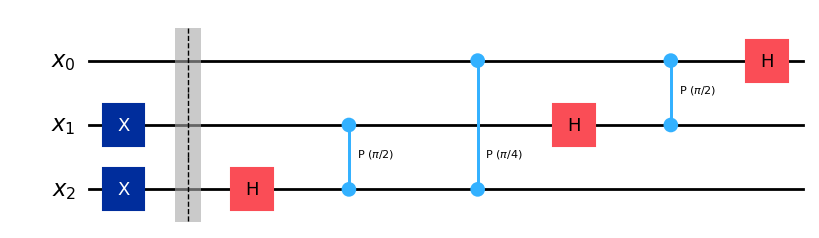

In [10]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister

# 3 qubit 양자 회로를 초기화한다.
qr = QuantumRegister(3,'x')
qc = QuantumCircuit(qr)

# 입력상태를 110 로 초기화한다.
qc.x(qr[1:3])
qc.barrier()

# 3 qubit QFT circuit
qc.h(2)
qc.cp(np.pi/2, 1, 2) # cR2
qc.cp(np.pi/4, 0, 2) # cR3
qc.h(1)
qc.cp(np.pi/2, 0, 1) # cR2
qc.h(0)

qc.draw(output='mpl')

In [11]:
# 2. Add the classical output in the form of measurement of all qubits
qc_measured = qc.measure_all(inplace=False)

# 3. Execute using a simulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc_measured)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1000)
result = job.result()
count = result[0].data.meas.get_counts()
print(count)

{'001': 128, '100': 108, '111': 132, '010': 127, '000': 134, '011': 122, '101': 115, '110': 134}


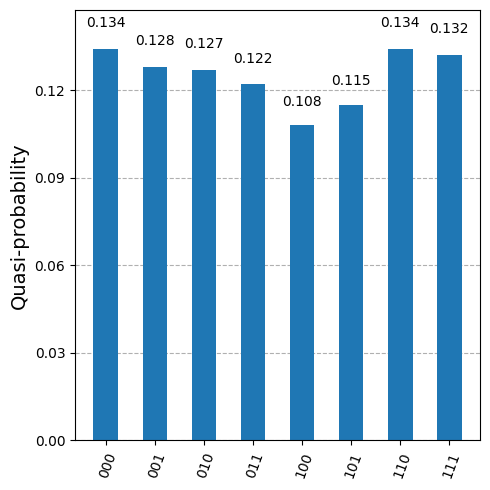

In [12]:
from qiskit.visualization import plot_distribution
plot_distribution(count, figsize=(5, 5))

In [13]:
# 회로의 양자 상태를 상태 벡터로 출력
from qiskit.quantum_info import Statevector
sv = Statevector(qc)
sv.draw(output = 'latex')

<IPython.core.display.Latex object>

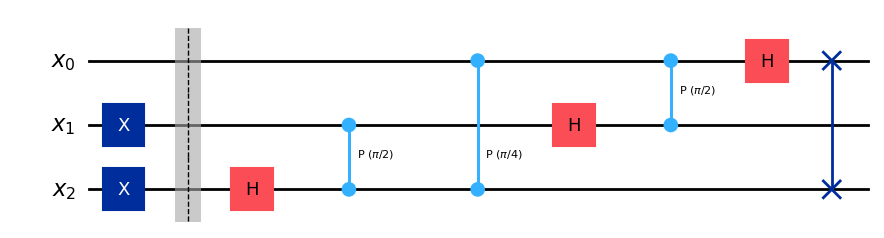

In [14]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister

# 3 qubit 양자 회로를 초기화한다.
qr = QuantumRegister(3,'x')
qc = QuantumCircuit(qr)

# 입력상태를 0b110 로 초기화한다.
qc.x(qr[1:3])
qc.barrier()

# 3 qubit QFT circuit
qc.h(2)
qc.cp(np.pi/2, 1, 2) # cR2
qc.cp(np.pi/4, 0, 2) # cR3
qc.h(1)
qc.cp(np.pi/2, 0, 1) # cR2
qc.h(0)
qc.swap(0,2) # 큐비트 순서를 역순으로 바꾸기
qc.draw(output='mpl')

In [15]:
# 회로의 양자 상태를 상태 벡터로 출력
from qiskit.quantum_info import Statevector
sv = Statevector(qc)
sv.draw(output = 'latex')

<IPython.core.display.Latex object>

### 6.2.4 QFT 클래스와 역 푸리에 변환

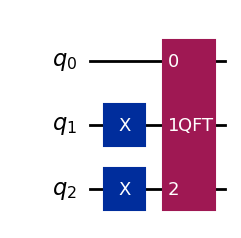

In [16]:
from qiskit.circuit.library import QFT

# 3 qubit 양자 회로를 초기화한다.
qc = QuantumCircuit(3)

# 입력상태를 0b110 로 초기화한다.
qc.x([1,2])
qft_c = QFT(3)
qc.compose(qft_c, range(3), inplace=True)

qc.draw(output='mpl')

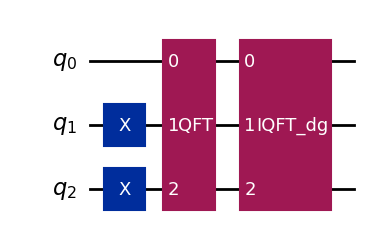

In [17]:
from qiskit.circuit.library import QFT

# 3 qubit 양자 회로를 초기화한다.
qc = QuantumCircuit(3)

# 입력상태를 0b110 로 초기화한다.
qc.x([1,2])

qc.compose(QFT(3), range(3), inplace=True)
qc.compose(QFT(3, inverse=True), range(3), inplace=True)
qc.draw(output='mpl')

어떤 양자 상태에 QFT를 적용하여 그 QFT 출력 상태에 대해 다시 IQFT를 적용하면 원래 상태가 복원되어야 한다.
이를 |110> 에 대해 확인해보자. 양자 회로를 시뮬레이터에 넣어서 실행하면 100%의 확률로 측정값 110이 측정된다.

In [18]:
# 2. Add the classical output in the form of measurement of all qubits
qc_measured = qc.measure_all(inplace=False)

# 3. Execute using a simulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc_measured)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1000)
result = job.result()
count = result[0].data.meas.get_counts()
print(count)

{'110': 1000}


## 6.3 양자 위상 추정 Quantum Phase Estimation
양자 위상 추정
1. 고유상태 준비:U의 고유벡터 psi>
2. 제어 연산과 QFT: 제어-U 게이트를 구현하여 반복적으로 적용하면서 위상 정보 기록, 마지막으로 QFT를 통해 위상 정보를 해독할 수도록 변환
3. 위상 정보 추정: QFT 결과로부터 얻어진 정보를 통해 고유값 lambda = e**2*pi*i*theta의 theta를 결정

### 6.3.1 양자 위상 추정 회로
-x 레지스터:t개의 평가 큐비트 evaluation qubits로 구성된 레지스터로 위상 값 측정 |+>**tensor product t
-y 레지스터: n-큐비트 레지스터. 위상을 추정하려는 U 게이트 적용되는 대상. 입력상태는 U의 고유벡터인 |psi_theta>

### 6.3.2 양자 위상 추정 회로의 코드 구현

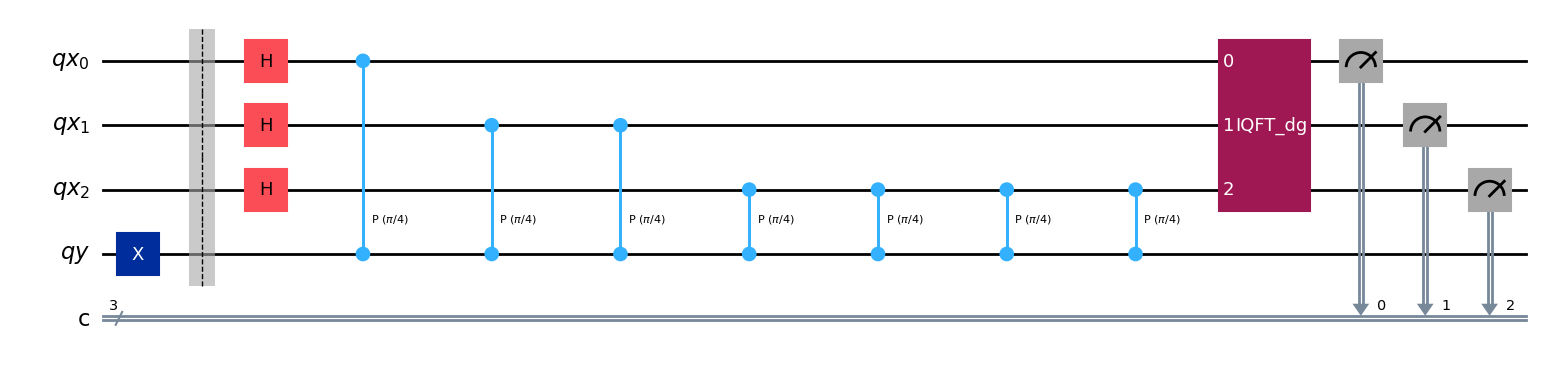

In [19]:
# phase estimation circuit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

t = 3
n = 1
qx = QuantumRegister(t,'qx') # t개의 평가 큐비트 evaluation qubits. 위상값 측정하는데 사용. 입력상태를 |+> 로 준비 phase estimation circuit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

t = 3
n = 1
qx = QuantumRegister(t,'qx') # t개의 평가 큐비트 evaluation qubits. 위상값 측정하는데 사용. 입력상태를 |+> 로 준비
qy = QuantumRegister(n,'qy') # n-qubit 레지스터. 위상을 추정하려는 U 게이트가 적용되는 대상. 입력상태를 |psi_theta> 로 준비
c = ClassicalRegister(t,'c')
qpe = QuantumCircuit(qx, qy, c)

phase = 1/8
qpe.x(qy) # eigenstate |1> # y 레지스터는 |1>로 초기화
qpe.barrier()
qpe.h(qx) # x 레지스터의 입력상태는 |x>
Un = 1
for qx_i in range(t):
    for i in range(Un):
        qpe.cp(2*np.pi*phase, qx[qx_i], qy); # controlled-P #.cp()를 호출하여 위상편이인자를 pi/4로 설정
    Un *= 2

qpe.compose(QFT(t, inverse=True), qx[:], inplace=True)
qpe.measure(qx,c)
qpe.draw(fold=-1, output='mpl')
# 100% 의 확률로 001이 측정됨
# theta = 001/2**3 = 1/8 임을 확인

In [20]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qpe)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1)
result = job.result()
count = result[0].data.c.get_counts()
print(count)

{'001': 1}


### 6.3.3 양자 위상 추정의 출력 분포
연산자 U의 고윳값이 위상 theta 가 x*2**-t 형태가 아닌 경우에는, 즉 theta를 이진표현으로 정확하게 나타낼 수 없는 경우에는, QPE 알고리즘을 통해 얻는 추정값은 평가 큐비트의 수에 따라 결정되는 확률 분포를 따르게 된다.

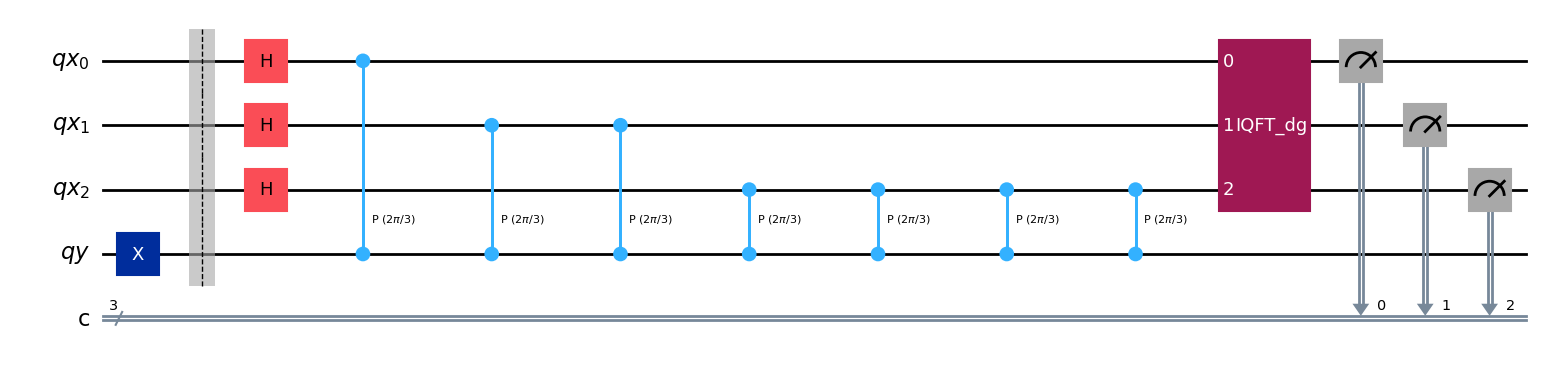

In [21]:
# phase estimation circuit
# P(2*pi/3) 게이트에 대한 QPE 코드
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

t = 3
n = 1
qx = QuantumRegister(t,'qx')
qy = QuantumRegister(n,'qy')
c = ClassicalRegister(t,'c')
qpe = QuantumCircuit(qx, qy, c)

phase = 1/3
qpe.x(qy) # eigenstate |1>
qpe.barrier()
qpe.h(qx)
Un = 1
for qx_i in range(t):
    for i in range(Un):
        qpe.cp(2*np.pi*phase, qx[qx_i], qy); # controlled-P
    Un *= 2

qpe.compose(QFT(t, inverse=True), qx[:], inplace=True)
qpe.measure(qx,c)
qpe.draw(fold=-1, output='mpl')

{'000': 172, '011': 6789, '010': 1786, '101': 195, '110': 127, '100': 480, '001': 333, '111': 118}


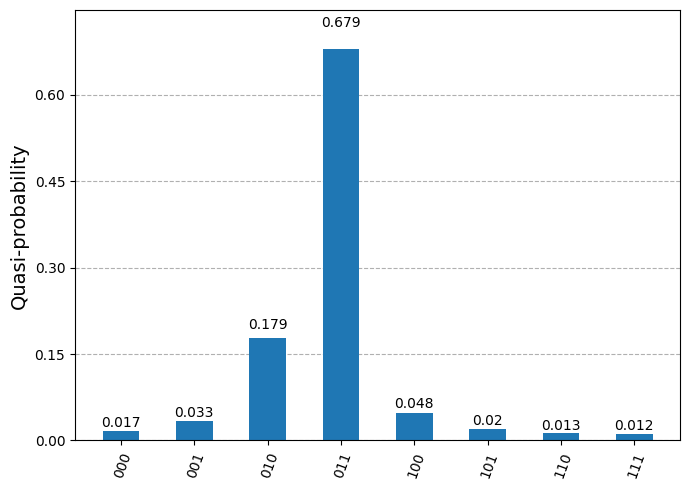

In [22]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qpe)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=10000)
result = job.result()
count = result[0].data.c.get_counts()
print(count)

from qiskit.visualization import plot_distribution
plot_distribution(count)
# theta의 참 값 1/3에 가까운 011(위상추정값 3/8), 010(위상추정값 2/8)이 가장 높은 빈도로 측정됨.

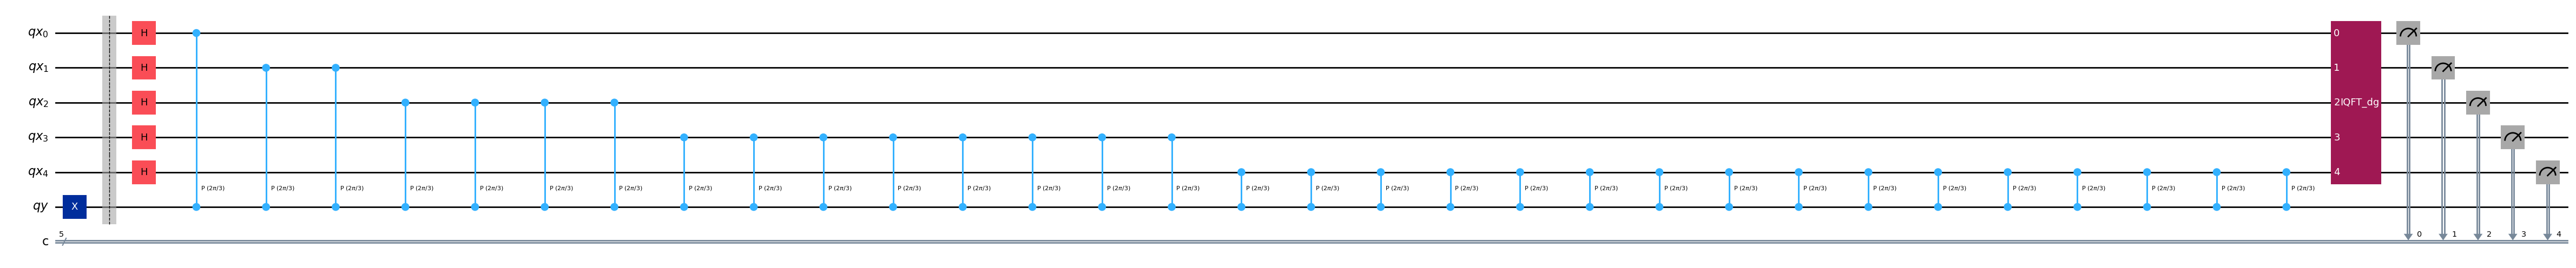

In [23]:
# phase estimation circuit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

t = 5
n = 1
qx = QuantumRegister(t,'qx')
qy = QuantumRegister(n,'qy')
c = ClassicalRegister(t,'c')
qpe = QuantumCircuit(qx, qy, c)

phase = 1/3
qpe.x(qy) # eigenstate |1>
qpe.barrier()
qpe.h(qx)
Un = 1
for qx_i in range(t):
    for i in range(Un):
        qpe.cp(2*np.pi*phase, qx[qx_i], qy); # controlled-P
    Un *= 2

qpe.compose(QFT(t, inverse=True), qx[:], inplace=True)
qpe.measure(qx,c)
qpe.draw(fold=-1, output='mpl')

{'01011': 6845, '01100': 461, '01010': 1689, '01001': 273, '01110': 69, '01101': 136, '01000': 101, '00000': 11, '00010': 10, '00011': 9, '00001': 16, '00111': 59, '10000': 38, '11001': 5, '11101': 10, '11100': 10, '11011': 6, '00110': 44, '10010': 16, '00101': 16, '10110': 8, '10011': 18, '10001': 28, '01111': 41, '11110': 5, '00100': 21, '11111': 8, '11000': 8, '10101': 11, '10111': 7, '11010': 10, '10100': 11}


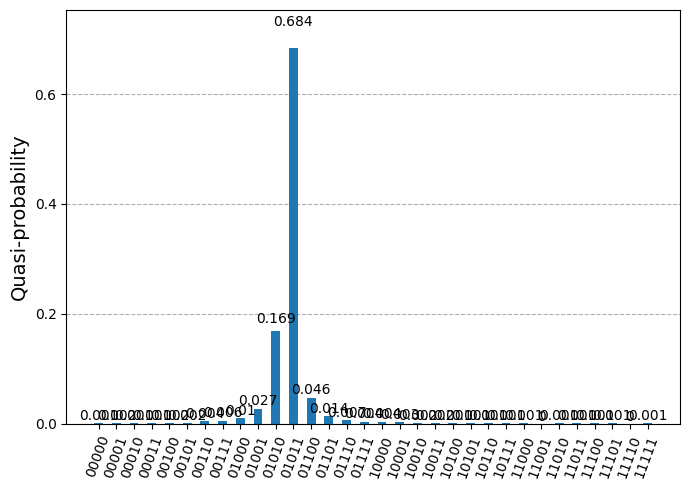

In [24]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qpe)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=10000)
result = job.result()
count = result[0].data.c.get_counts()
print(count)

from qiskit.visualization import plot_distribution
plot_distribution(count)
# theta = 1/3 에 가장 가까운 01011, 01010 의 추정빈도가 높은 편으로 나타내ㅏㄴ다.

- 위상 theta 를 이진 표현으로 정확하게 나타낼 수 없는 경우에는 QPE로부터 추정된 위상 값이 평가 큐비트 수에 따라 결정되는 확률분포를 따름, 평가 큐비트 수 ↑ -> 추정값의 정확도 ↑
- 위상 theta 가 x/2**t 로 표현할 수 없는 경우, 평가 큐비트의 개수 t에 따라 위상 추정값의 확률 분포가 이론적으로 예측됨.

### 6.3.4 n-큐비트 게이트의 양자 위상 추정 회로
- 멀티-큐비트 게이트의 위상 추정 회로를 구현.
- 2-qubit 게이트 U를 고려.

In [25]:
U = [[np.exp(2j*np.pi/8), 0, 0, 0],
        [0, np.exp(2j*np.pi*2/8), 0, 0],
        [0, 0, np.exp(2j*np.pi*3/8), 0],
        [0, 0, 0, np.exp(2j*np.pi*4/8)]]

from qiskit.visualization import array_to_latex
array_to_latex(U, prefix="U = ",max_size=16)

<IPython.core.display.Latex object>

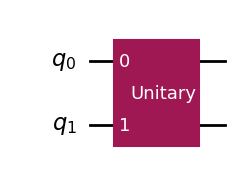

In [26]:
Ucircuit = QuantumCircuit(2)
Ucircuit.unitary(U, [0,1]) # unitary 연산 U를 구현하는 양자 회로 Ucircuit 생성
Ucircuit.draw(output='mpl')

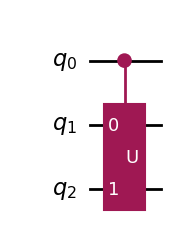

In [27]:
# Ucircuit 을 Gate 객체 Ugate 로 만들고 이름을 "U"로 정한다.
Ugate = Ucircuit.to_gate() # 하나의 양자 게이트 객체로 변환
Ugate.name = "U"

# 제어-U 게이트 cUgate 를 만들고 양자 회로 qc 에 연결한다.
cUgate = Ugate.control(1) # 제어 큐비트 추가
qc = QuantumCircuit(3)
qc.append(cUgate, [0,1,2]) # q0 is control
qc.draw(output='mpl')

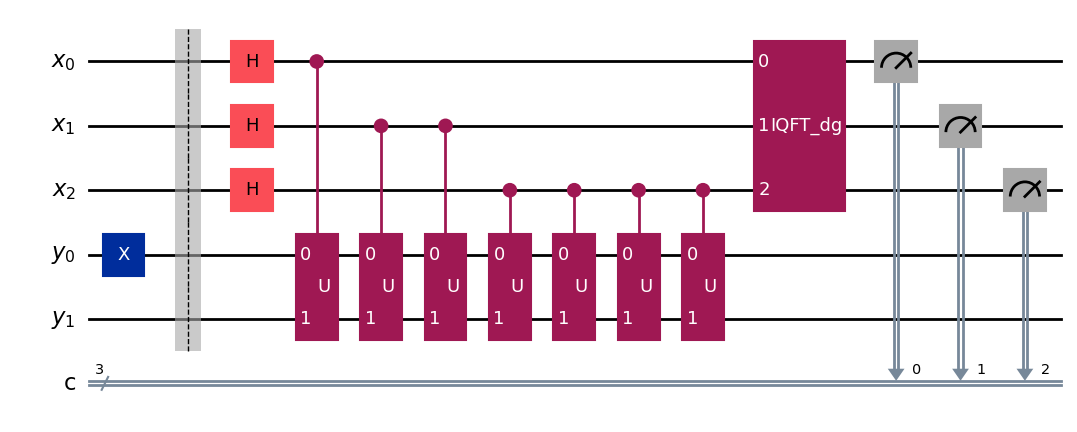

In [28]:
# 2-qubit U gate 에 대한 위상추정(QPE) 회로
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

t = 3
n = 2
qx = QuantumRegister(t,'x')
qy = QuantumRegister(n,'y')
c = ClassicalRegister(t,'c')
qpe = QuantumCircuit(qx, qy, c)

qpe.x(qy[0]) # 고유벡터 |01>
qpe.barrier()
qpe.h(qx)
Un = 1
for qx_i in range(t):
    for i in range(Un):
        qpe.append(cUgate, [qx[qx_i], qy[0], qy[1]]); # controlled-U
    Un *= 2

qpe.compose(QFT(t, inverse=True), qx[:], inplace=True)
qpe.measure(qx,c)
qpe.draw(fold=-1, output='mpl')

### 6.3.5 PhaseEstimation클래스
- QPE 회로는 qiskit패키지에 qiskit.circuit.library.PhaseEstimation 클래스로 구현되어 있음.
- class qiskit.circuit.library.PhaseEstimation(num_evaluation_qubits, unitary, iqft=None, name='QPE')

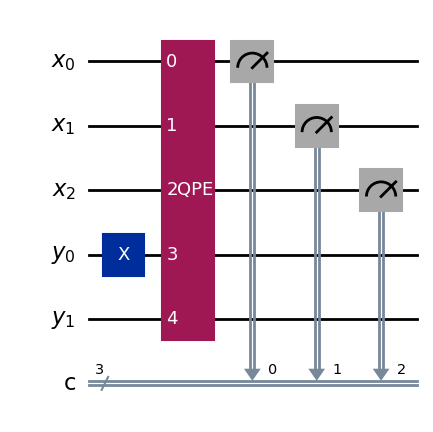

In [29]:
# phase estimation using PhaseEstimation class with QFT
from qiskit.circuit.library import QFT,PhaseEstimation                   # type: ignore
t = 3
n = 2
qx = QuantumRegister(t,'x')
qy = QuantumRegister(n,'y')
c = ClassicalRegister(t,'c')
qpe = QuantumCircuit(qx, qy, c)
qpe.x(qy[0]) #|01> # input state = |1>
qpe.append(PhaseEstimation(t,Ugate,QFT(t,inverse=True)),qx[:]+qy[:])
qpe.measure(qx,c)
qpe.draw(output='mpl',fold=-1)

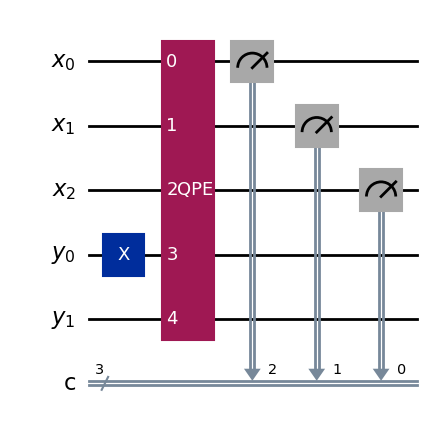

In [30]:
# phase estimation using PhaseEstimation class with default QFT
# PhaseEstimation 클래스 생성 시, 세번째 인자인 IQFT 회로를 지정하지 않으면 디폴트 IQFT 회로가 적용된다. 디폴트 IQFT 회로에서는 평가 큐비트의 순서가 SWAP 되어 있지 않다.
# 세번째 인자 없이 객체를 생성하면, 평가 큐비트의 순서가 역순으로 되었기 때문에, 평가 큐비트를 측정하고 그 결과를 고전 레지스터에 할당하는 함수 qpe.measure(qx, reversed(c))를 호출할 때 reversed(c)를 인자로 사용
from qiskit.circuit.library import QFT,PhaseEstimation            # type: ignore
t = 3
n = 2
qx = QuantumRegister(t,'x')
qy = QuantumRegister(n,'y')
c = ClassicalRegister(t,'c')
qpe = QuantumCircuit(qx, qy, c)
qpe.x(qy[0]) # input state = |1>
qpe.append(PhaseEstimation(t,Ugate),qx[:]+qy[:])
qpe.measure(qx,reversed(c))
qpe.draw(output='mpl',fold=-1)

## 6.4 쇼어 알고리즘
- 다항 시간 내에 정수를 소인수 분해하는 알고리즘
  - 알고리즘 내에서 양자 컴퓨팅이 사용되는 부분은 QPE를 이용한 위수order 찾기 연산.

### 6.4.1 모듈로-N 연산과 위수
- a**r(modN)=1을 만족하는 가장 작은 양의 정수 r: 모듈로-N(modulo-N) 연산에 대한 a의 위수order

7**1 mod15 = 7, 7**2 mod15 = 4,  7**3 mod15 = 13, 7**4 mod15 = 1

따라서, 모듈로-15 연산에 대한 7의 위수는 r=4 임을 알 수 있다. 즉, 함수 f(x)= 7**x mod(150)는 1-7-4-13-1-7-4-13 을 반복하는 f(x+r)=f(x) 형태의 주기 함수


### 6.4.2 양자 위상 추정으로 위수 찾기
- U|y> = |aymod(N)> (a, N은 서로소인 양의 정수. a<N)

### 6.4.3 위상 추정과 위수 찾기

(a) 양자 레지스터의 크기 결정
- 양자 위상 추정 회로에서는 x 레지스터의 크기, 즉 평가 큐비트의 개수 t를 적절히 설정해야...
- theta = s/r ~ x*2**(-t)
- 인접한 theta 값 사이의 간격 delta(theta) = theta(n-1)-theta(n) = 1/n-1 - 1/n ~ n**-2
- 측정값 x*2**-t로부터 theta = s/r 의 가능한 값 중 하나를 명확히 추정할 수 있도록 2**-t는 delta(theta)min의 절반보다 작게 설정되어야... ==> delta(theta)min ~ n**-2 ~ 2**-(t-1) , n~2**n 일 때, t ~ 2n+1이 된다.

(b) 연분수continued fraction 표현과 위수 찾기


In [31]:
# 1101102(2)/2**7을 연분수로
from fractions import Fraction
# 분모가 7 이하인 유리수 중에서 108/128과 가장 가까운 유리수의 분자와 분모를 찾는다.
f = Fraction(108/128).limit_denominator(7)
r = f.denominator
s = f.numerator
print(f"estimated phase = {s}/{r}")

estimated phase = 5/6


(c)  약분에 의해 잘못된 위수를 찾게 되는 경우
- theta = s/r

### 6.4.4 위수 찾기와 소인수 분해
- 두개의 서로 다른 소수 p와 q의 곱으로 표현되는 n-비트 정수 N=pq 를 고려.
- a^r = 1 mod(N) -> a^r-1 = N*m
  - 위수 r이 짝수라면, a^r -1 = (a^r/2 +1)(a^r/2 -1)=mpq

위수 r이 짝수인 경우에는 다음의 세 가지 중 하나가 성립한다.
1. p는 (a^r/2+1) 의 약수이고, q는 (a^r/2-1) 의 약수이다.
2. p는 (a^r/2-1)의 약수이고, q는 (a^r/2+1) 의 약수이다.
3. p, q 모두 (a^r/2 +1)의 약수이다.

유클리드의 최대공약수 f=gcd(a^r/2 +1, N)을 계산하면,
1. f=gcd(a^r/2 +1, N)  =p
2. f=gcd(a^r/2 +1, N)  =q
3. f=gcd(a^r/2 +1, N) =pq =N

최대공약수 f를 확인하여 f is not N이면, f=p 혹은 q이다. ==> N의 소인수를 찾았다.



### 6.4.5 쇼어의 소인수분해 알고리즘

### 6.4.6 쇼어 알고리즘 구현: 21의 소인수 분해

In [65]:
import numpy as np
from numpy.random import randint
from math import gcd, lcm

#factoring N=21
N=21 # number to be factored
n=5 # number of qubits representing N
t = 2*n+1 # number of evaluation qubits
a = randint(2, N)
g = gcd(a, N)
print(f'a={a}, gcd({a}, {N})={g}') # if g != 1, g is factor of N
#gcd(a, N)=1 이면 r=ord_N(a)를 찾는 과정을 진행한다.

a=17, gcd(17, 21)=1


In [66]:
# myQPE() returns phase estimation circuit
from qiskit.circuit.library import QFT

def myQPE(t, unitary):
    n = unitary.num_qubits
    rx = QuantumRegister(t,'qx')
    ry = QuantumRegister(n,'qy')
    qc = QuantumCircuit(rx, ry)

    # QuantumCircuit 객체 unitary 를 Gate 객체 gate 로 만들고 이름을 "U"로 정한다.
    gate = unitary.to_gate()
    gate.name = "U"

    # 제어-U 게이트 c_gate 를 만들고 QPE 회로를 생성한다.
    c_gate = gate.control(1)

    qc.h(rx)
    for i in range(t):
        for j in range(2**i):
            qc.append(c_gate, rx[i:i+1]+ry[:])

    qc.append(QFT(t,inverse=True),rx)
    qc.name = 'myQPE'
    return qc

In [67]:
# generate U matrix of (a*i) mod N
# a^x mod(N) 을 구현하는 양자 회로 qcU를 생성하는 코드
two_power_n = 1 << n # 2^n
U = np.eye(two_power_n) # Identity matrix
for j in range(N):
    U[j][j] = 0
    U[(a*j)%N][j] = 1
# U 행렬을 구현하는 양자 회로 qcU 를 생성
qcU = QuantumCircuit(n)
qcU.unitary(U, range(n))

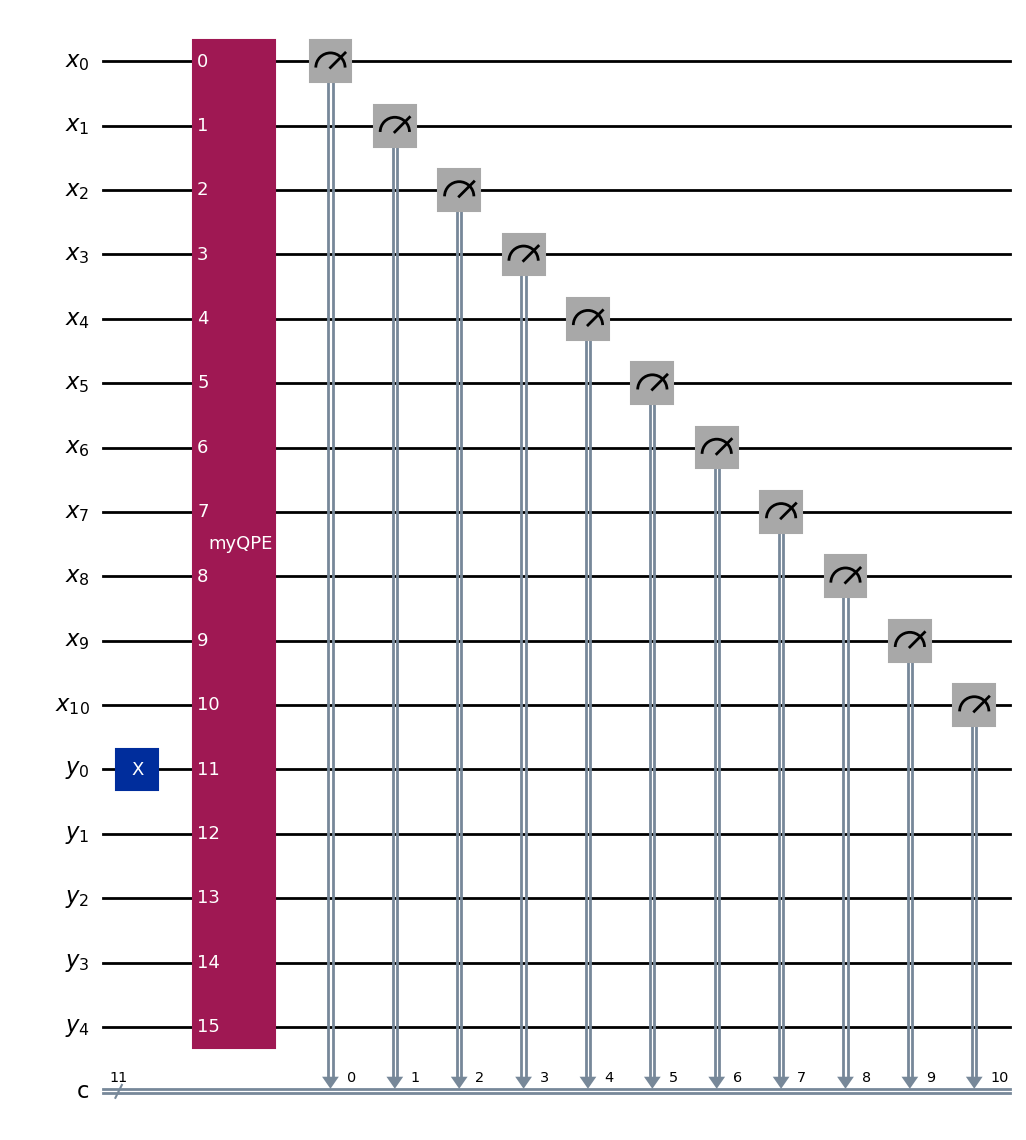

In [68]:
# generate a order-finding circuit using myQPE
qx = QuantumRegister(t,'x')
qy = QuantumRegister(n,'y')
c = ClassicalRegister(t,'c')
qc_of = QuantumCircuit(qx, qy, c)
qc_of.x(qy[0])                 # input state = |1>
qc_of.append(myQPE(t,qcU),qx[:]+qy[:])
qc_of.measure(qx,c)
qc_of.draw(output='mpl',fold=-1)

In [69]:
#from qiskit.visualization import array_to_latex
#array_to_latex(U, prefix="U = ", max_size=32)

<IPython.core.display.Latex object>

제어-U^2k 연산(모듈러 지수 연산) 실행
-U^2^k|y> = |y(a^2^k(modN)modN)>=|y(a^2^(k-1) * a^2^(k-1) modN)modN>
- 양자 레지스터 qx:t 큐비트 평가 레지스터. 위상 측정하기 위해 사용.
- 양자 레지스터 qy:n 큐비트 레지스터. 위상 추정 대상인 양자 게이트 U의 입력 레지스터.
- 고전 레지스터 c:t 비 고전 레지스터. 평가 큐비트의 측정 결과 저장.

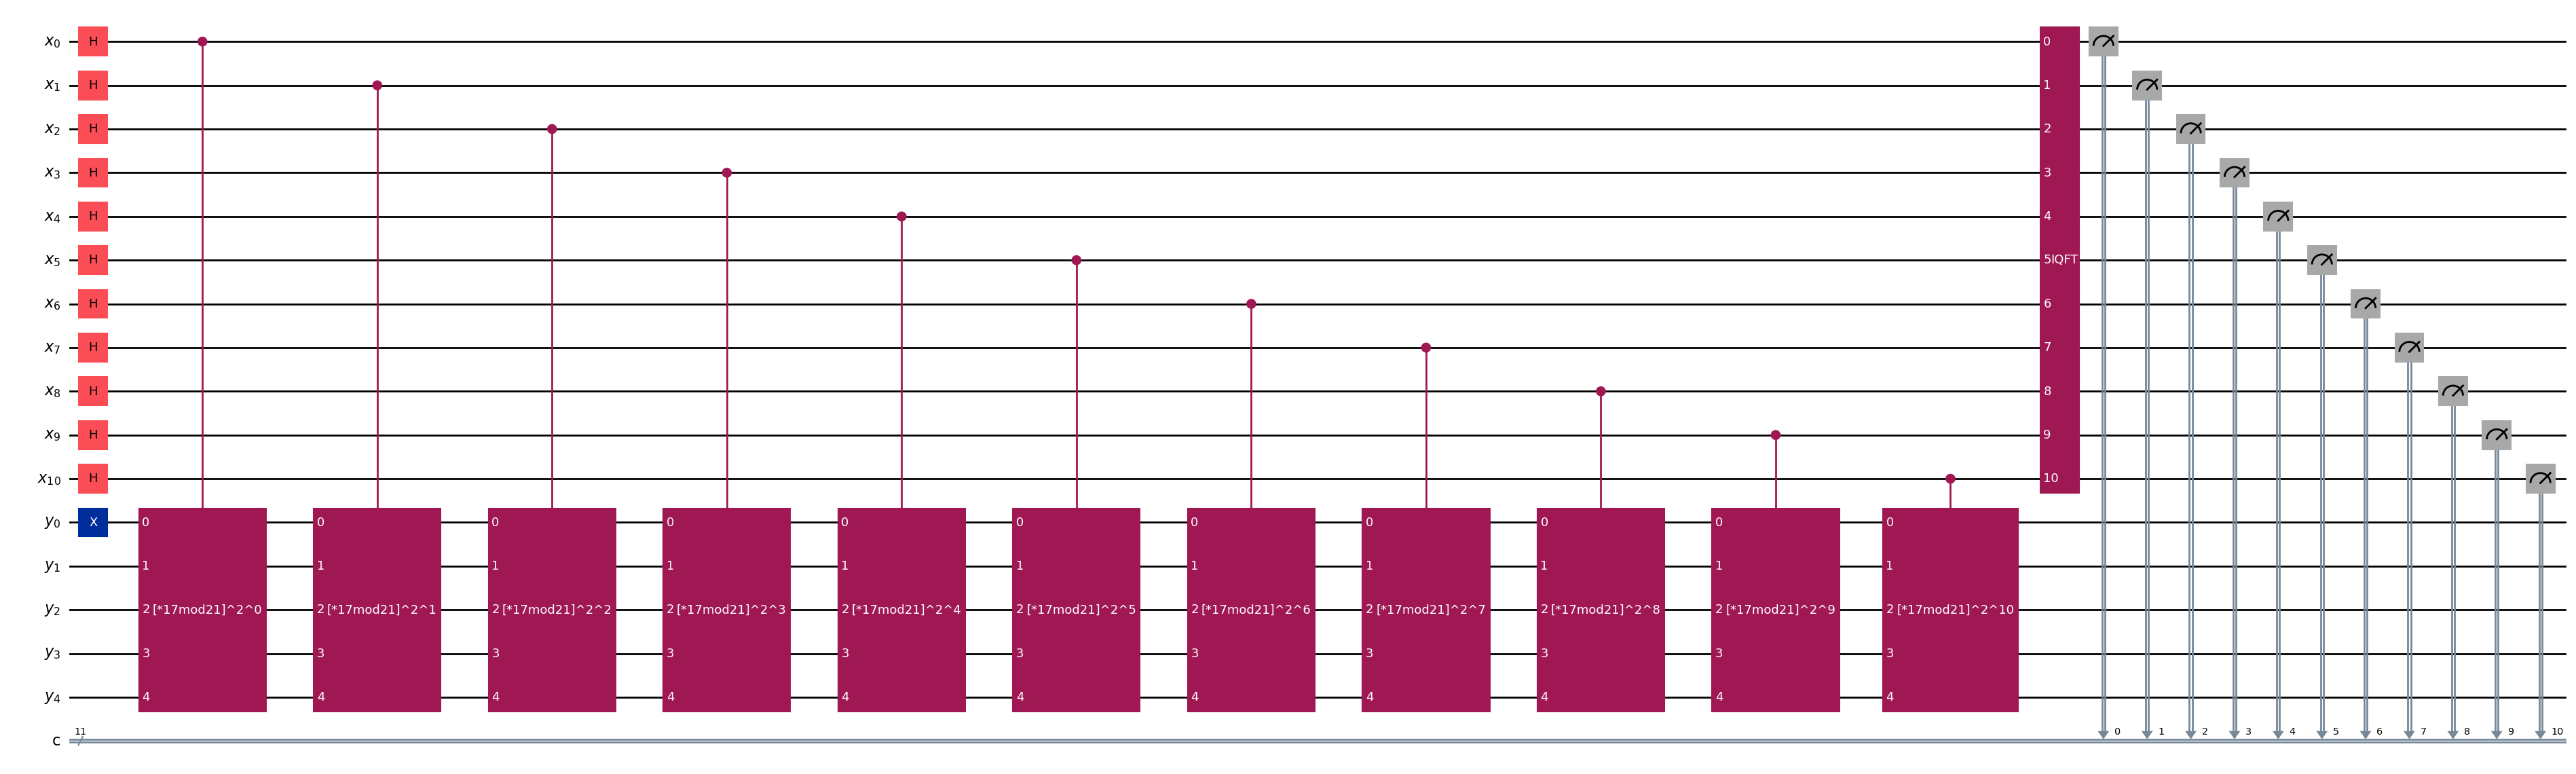

In [70]:
# generate a order-finding circuit

qx = QuantumRegister(t,'x')
qy = QuantumRegister(n,'y')
c = ClassicalRegister(t,'c')
qc_of = QuantumCircuit(qx, qy, c)
qc_of.x(qy[0])                 # input state = |1>

qc_of.h(qx)

two_power_n = 1 << n # 2^n
u_power = np.eye(two_power_n) # Identity matrix
for j in range(N):
    u_power[j][j] = 0
    u_power[(a*j)%N][j] = 1

for i in range(t):
    qc_u_power = QuantumCircuit(n)
    qc_u_power.unitary(u_power, range(n))
    gate_u_power = qc_u_power.to_gate()
    gate_u_power.name = f'[*{a}mod{N}]^2^{i}'
    c_gate_u_power = gate_u_power.control(1)
    qc_of.append(c_gate_u_power, [qx[i]]+qy[:])
    u_power = u_power @ u_power


qc_of.append(QFT(t,inverse=True),qx)

qc_of.measure(qx,c)
qc_of.draw(output='mpl',fold=-1)


In [71]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_circuit = pm.run(qc_of)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1000)
result = job.result()
count = result[0].data.c.get_counts()
print(count)

{'11010101011': 132, '10000000000': 165, '01010101001': 1, '00101010101': 113, '01010101011': 113, '00000000000': 146, '10101010101': 123, '00101010110': 30, '11010101010': 30, '01010101010': 31, '10101010110': 29, '10101010111': 6, '00101010011': 4, '11001000010': 1, '11010110110': 2, '10101010100': 5, '11010101101': 1, '11010101100': 9, '01010100111': 1, '00110011111': 1, '00101010111': 6, '00101010100': 6, '10101001011': 1, '01010101100': 5, '10101011000': 2, '01010100100': 2, '10101011001': 2, '00101011001': 1, '10101011101': 1, '10101001101': 2, '10010100000': 1, '10101011010': 1, '11011000101': 1, '11010101001': 5, '01010110000': 1, '11010110010': 1, '00101011010': 1, '10101010011': 1, '00101011000': 1, '01010101110': 1, '11010110000': 2, '01010101000': 1, '00101010010': 1, '10011011011': 1, '10101011111': 1, '00101000101': 1, '01010111011': 1, '11010100111': 2, '10101010010': 1, '11010110001': 2, '00101101011': 1, '10101010000': 1}


In [72]:
phase = list(count.keys())
print('measured output state=', phase[0])

measured output state= 11010101011


In [73]:
#연분수 알고리즘으로 위수 r을 추정하는 코드
from fractions import Fraction
s_pre = int(phase[0],2)
r_pre = 1<<t # r_pred == 2^t
print(f'measured phase ={s_pre}/{r_pre}')
f = Fraction(s_pre/r_pre).limit_denominator(N)
r = f.denominator
s = f.numerator
print(f"estimated phase={s}/{r}")
print(f"estimated order={r}")
# measured output state가 measured phase를 의미한다.

measured phase =1707/2048
estimated phase=5/6
estimated order=6


In [74]:
def estimate_order(sampler, isa_circuit, t):
    job = sampler.run([isa_circuit], shots=1)
    result = job.result()
    count = result[0].data.c.get_counts()
    phase = list(count.keys())
    s_pre = int(phase[0],2) # convert a binary string to an integer
    r_pre = 1<<t  # r_pre == 2^t
    f = Fraction(s_pre/r_pre).limit_denominator(N-1)
    return  f.denominator

def confirm_order(a, r, N):
    return (a**r % N == 1)

r = estimate_order(sampler, isa_circuit, t)
if confirm_order(a, r, N):
    found = True
else :
    r1 = r
    r2 = estimate_order(sampler, isa_circuit, t)
    if confirm_order(a, r2, N):
        r = r2
        found = True
    else :
        r = lcm(r1, r2)
        if r >= N :
            found = False
        elif confirm_order(a, r, N):
            found = True
        else :
            found = False
    print(f"r1={r1} r2={r2} estimated r={r}")

if (found) :
    print(f"estimated value {r} is an order of {a} for {N}")
else :
    print(f"{r} is NOT an order of {a} for {N} because {a}^{r} % {N} = {a**r%N}")

r1=2 r2=1 estimated r=2
2 is NOT an order of 17 for 21 because 17^2 % 21 = 16


In [75]:
if r % 2 == 0 : # r is even
    a_power_r_over2 = a**int(r/2)
    p = gcd(a_power_r_over2+1,N)
    print (f"p = gcd( {a}^({r}/2) + 1 (= {a_power_r_over2+1}), {N} ) = {p}")
    if (p == N)  :
        print (f"{a}^({r}/2) + 1 (= {a_power_r_over2+1}) is a multiple of {N}.")
        print (f" a = {a} is not lucky. try again.")
    elif (p == 1) :
        print (f" r = {r} is not an order of {a}. try again.")
    else :
        q = gcd(a_power_r_over2-1,N)
        print (f"q = gcd( {a}^({r}/2) - 1 (= {a_power_r_over2-1}), {N} ) = {q}")
        print (f"{p} and {q} are factors of {N}")
else :
    print (f"r = {r} is an odd number. a = {a} is not lucky. try again.")

p = gcd( 17^(2/2) + 1 (= 18), 21 ) = 3
q = gcd( 17^(2/2) - 1 (= 16), 21 ) = 1
3 and 1 are factors of 21
